In [5]:
import pandas as pd
import numpy as np

In [3]:
prsa_data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.2%20numeric%20features/data/PRSA_Data.csv").set_index('Unnamed: 0').reset_index(drop=True)

In [6]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


<ipython-input-15-bf046abecc7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prsa_data.SO2)


<Axes: xlabel='SO2', ylabel='Density'>

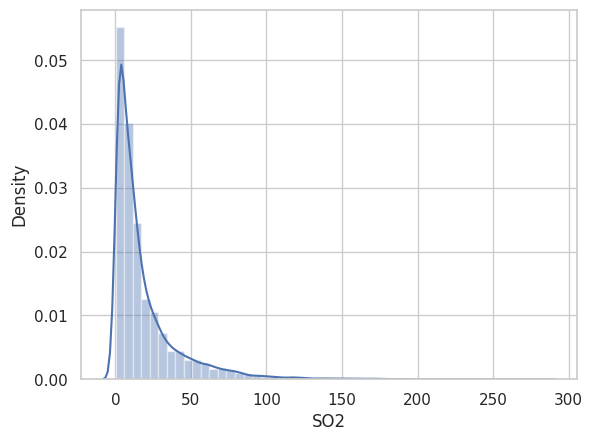

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(prsa_data.SO2)



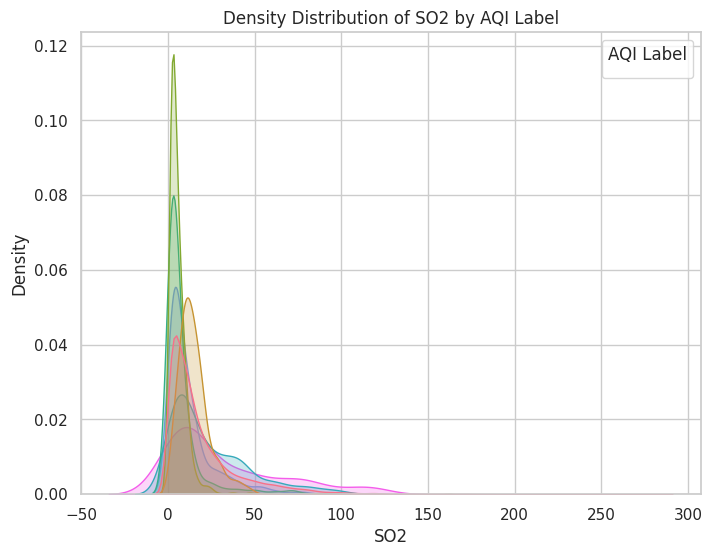

In [17]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=prsa_data[prsa_data['SO2'] != 0], x='SO2', hue='AQI Label', fill=True, palette='husl', common_norm=False)
plt.title('Density Distribution of SO2 by AQI Label')
plt.xlabel('SO2')
plt.ylabel('Density')
plt.legend(title='AQI Label')
plt.show()



задание 2

<Axes: xlabel='PRES', ylabel='Count'>

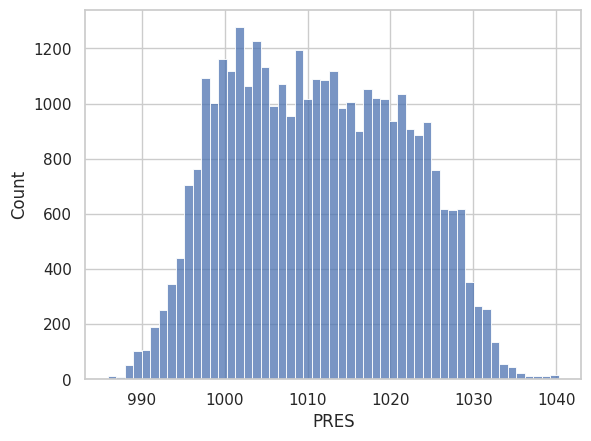

In [18]:
sns.histplot(prsa_data.PRES)

<Axes: xlabel='PRES', ylabel='Count'>

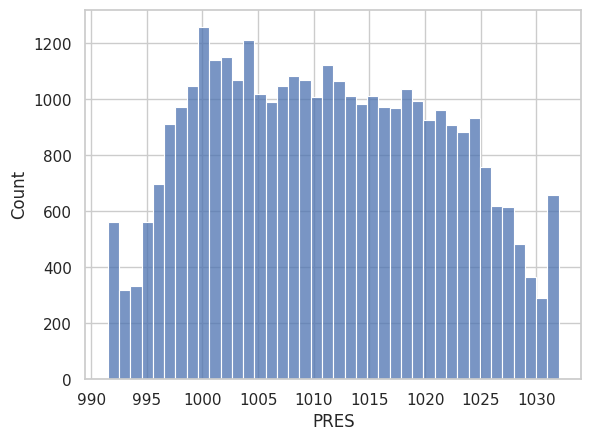

In [20]:

clip_lower = prsa_data[numerical_attributes].quantile(0.01)
clip_upper = prsa_data[numerical_attributes].quantile(0.99)


clipped_data = prsa_data.copy()
for attribute in numerical_attributes:
    clipped_data[attribute] = clipped_data[attribute].clip(clip_lower[attribute], clip_upper[attribute])

sns.histplot(clipped_data.PRES)


задание 3

In [22]:

numeric_data = clipped_data.select_dtypes(include=[np.number])


filled_data = numeric_data.fillna(numeric_data.mean())


for column in clipped_data.columns:
    if column not in numeric_data.columns:
        filled_data[column] = clipped_data[column]


missing_values = filled_data.isnull().sum()
print("Количество пропущенных значений после заполнения:\n", missing_values)



Количество пропущенных значений после заполнения:
 No           0
SO2          0
NO2          0
CO           0
O3           0
PRES         0
RAIN         0
WSPM         0
wd           0
AQI Label    0
dtype: int64


заполнил средним

задание 4


In [23]:
import numpy as np

# Логарифмическая нормализация для SO2, NO2 и CO
prsa_data['SO2'] = np.log1p(prsa_data['SO2'])
prsa_data['NO2'] = np.log1p(prsa_data['NO2'])
prsa_data['CO'] = np.log1p(prsa_data['CO'])

# Проверим результат
prsa_data[['SO2', 'NO2', 'CO']].head()


,SO2,NO2,CO
0,1.945910,3.367296,5.993961
1,1.945910,3.367296,5.993961
2,NaN,2.995732,5.993961
3,2.197225,2.708050,NaN
4,2.302585,NaN,5.707110


Задание 5

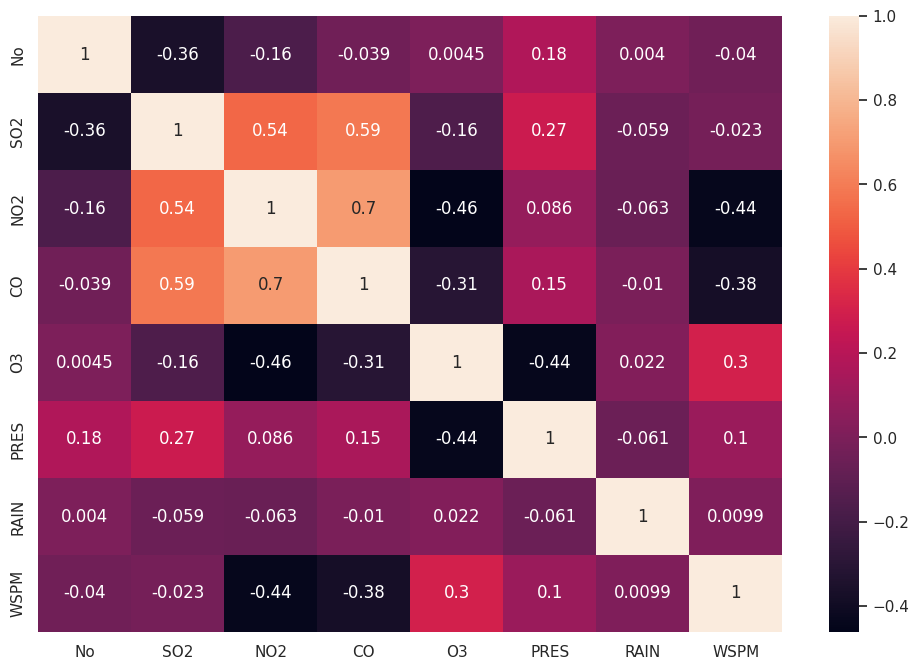

In [30]:
# Удалим категориальные столбцы перед вычислением корреляции
numerical_data = prsa_data.drop(['wd', 'AQI Label'], axis=1)

# Вычислим матрицу корреляции для численных признаков
correlation_matrix = numerical_data.corr()

# Построим корреллограмму
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()



Задание 6

<ipython-input-33-68a75dbd0edd>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = hierarchy.linkage(distance_matrix, method='ward')


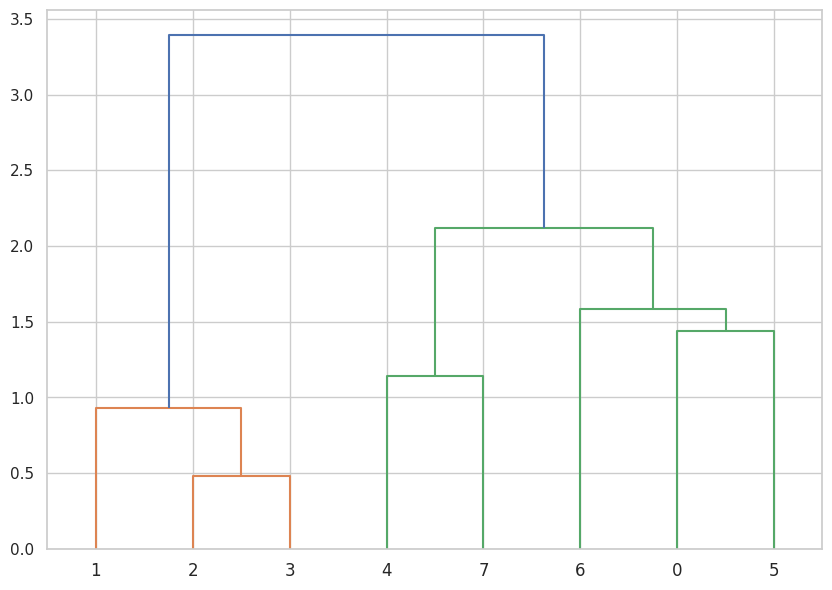

In [33]:
# Визуализация связей между числовыми признаками
from scipy.cluster import hierarchy
distance_matrix = 1 - correlation_matrix

dendrogram = hierarchy.linkage(distance_matrix, method='ward')

plt.figure(figsize=(10, 7))
hierarchy.dendrogram(dendrogram)
plt.show()
